Define a function to 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz


def generate_brownian_motion(n_paths,n_steps, dt, x0):
    '''
    generate Brownian motion paths.
    The function take the number of paths, the number of steps, the time interval, and the initial value as inputs, 
    and return a matrix of paths as output.
    '''
    dW = np.sqrt(dt) * np.random.randn(n_paths, n_steps)
    dW[:,0] = 0
    W = np.cumsum(dW, axis = 1)
    return x0 + W

def compute_stochastic_integral(f, paths, t):
    '''
    Define a function to compute the stochastic integral of a given function of Brownian motion using the Riemann sum approximation. 
    The function take the function, the Brownian motion paths, and the time interval as inputs, and return a vector of integral values as output.
    '''
    integral = np.ones_like(paths)
    n_paths = paths.shape[0]
    for i in range(n_paths): 
        integral[i] = cumtrapz(f(t,paths[i]), paths[i], initial=0)
    return integral

def good_integrand_1(t,path):
    return 4 * path**3

def good_integrand_2(t, path):
    return np.exp(t/ 2) * np.sin(path)

def bad_integrand(t,path):
    return np.exp(path **2)


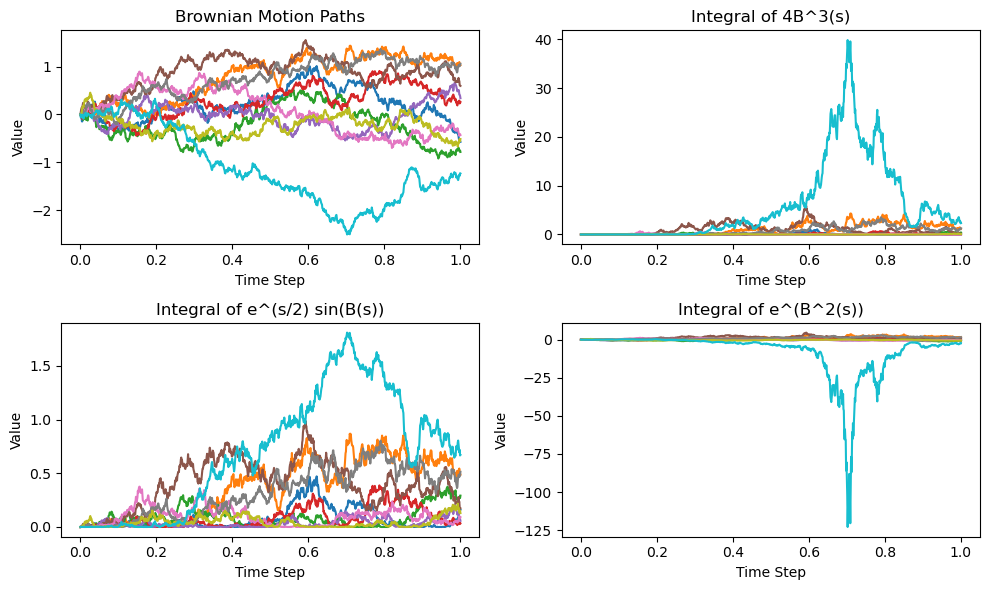

In [50]:
n_paths = 10
n_steps = 1000
dt = 0.001
x0 = 0

paths = generate_brownian_motion(n_paths, n_steps, dt, x0)
t = np.linspace(0, n_steps * dt, n_steps)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(t,paths.T)
plt.title('Brownian Motion Paths')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.subplot(2, 2, 2)

integral_1 = compute_stochastic_integral(good_integrand_1, paths, t)
plt.plot(t,integral_1.T)
plt.title('Integral of 4B^3(s)')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.subplot(2, 2, 3)
integral_2 = compute_stochastic_integral(good_integrand_2, paths, dt)
plt.plot(t,integral_2.T)
plt.title('Integral of e^(s/2) sin(B(s))')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.subplot(2, 2, 4)
integral_bad = compute_stochastic_integral(bad_integrand, paths, dt)
plt.plot(t,integral_bad.T)
plt.title('Integral of e^(B^2(s))')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Value')

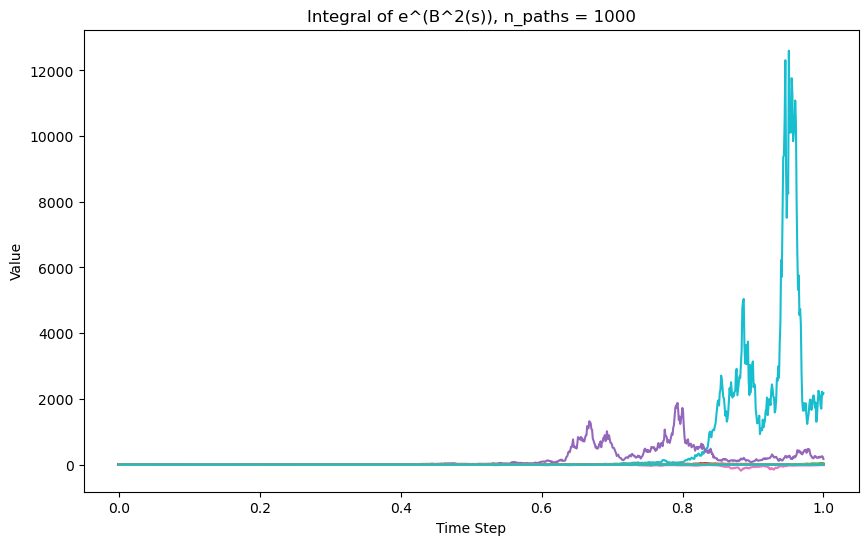

In [55]:
n_paths = 100
n_steps = 1000
dt = 0.001
x0 = 0
paths = generate_brownian_motion(n_paths, n_steps, dt, x0)
t = np.linspace(0, n_steps * dt, n_steps)

integral_bad = compute_stochastic_integral(bad_integrand, paths, dt)

plt.figure(figsize=(10, 6))
plt.plot(t,integral_bad.T)
plt.title('Integral of e^(B^2(s)), n_paths = 1000')
plt.xlabel('Time Step')
plt.ylabel('Value')


If a stochastic process **X** fails to be square integrable, it means that the expectation of the integral of **X** squared over a finite time interval is infinite. FCompared to the good intergral , the integral sample paths of the bad intergrad exhibit some behaviors.
1) the process may not converge or may not be bounded.
2) Expectation of the integral: the integral of the process squared over a finite time interval is infinite
